In [1]:
# Importamos las librerías necesarias:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Cargamos el conjunto de datos (El archivo fué descargado de Kaggle):
df = pd.read_csv('C:\Técnico-Universitario-Data-Science\Machine-Learning-Clasificación-Y-Regresión\M1\AmesHousing.csv')

In [3]:
# Visualizamos las primeras filas del dataframe: Notamos que hay columnas que tienen valores no numéricos.
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [4]:
# Dividimos el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba).
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
# Contamos el número de valores nulos en cada columna: Tenemos en la columna "Lot Frontage" 490 valores nulos.
null_counts = df.isnull().sum()
print(null_counts)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [6]:
# Sumamos el total de valores nulos en el DataFrame: En este caso es de 15.749 valores nulos.
total_nulls = null_counts.sum()
print("Total de valores nulos:", total_nulls)

Total de valores nulos: 15749


In [7]:
# Seleccionamos solo las columnas numéricas:
numeric_columns = df.select_dtypes(include=[np.number])
# Calculamos la matriz de correlación:
correlation_matrix = numeric_columns.corr()
# Filtramos las correlaciones superiores al 60%:
high_correlation = correlation_matrix[correlation_matrix > 0.6]
# Visualizamos las variables con correlaciones superiores al 60%:
print(high_correlation)

                 Order  PID  MS SubClass  Lot Frontage  Lot Area  \
Order              1.0  NaN          NaN           NaN       NaN   
PID                NaN  1.0          NaN           NaN       NaN   
MS SubClass        NaN  NaN          1.0           NaN       NaN   
Lot Frontage       NaN  NaN          NaN           1.0       NaN   
Lot Area           NaN  NaN          NaN           NaN       1.0   
Overall Qual       NaN  NaN          NaN           NaN       NaN   
Overall Cond       NaN  NaN          NaN           NaN       NaN   
Year Built         NaN  NaN          NaN           NaN       NaN   
Year Remod/Add     NaN  NaN          NaN           NaN       NaN   
Mas Vnr Area       NaN  NaN          NaN           NaN       NaN   
BsmtFin SF 1       NaN  NaN          NaN           NaN       NaN   
BsmtFin SF 2       NaN  NaN          NaN           NaN       NaN   
Bsmt Unf SF        NaN  NaN          NaN           NaN       NaN   
Total Bsmt SF      NaN  NaN          NaN        

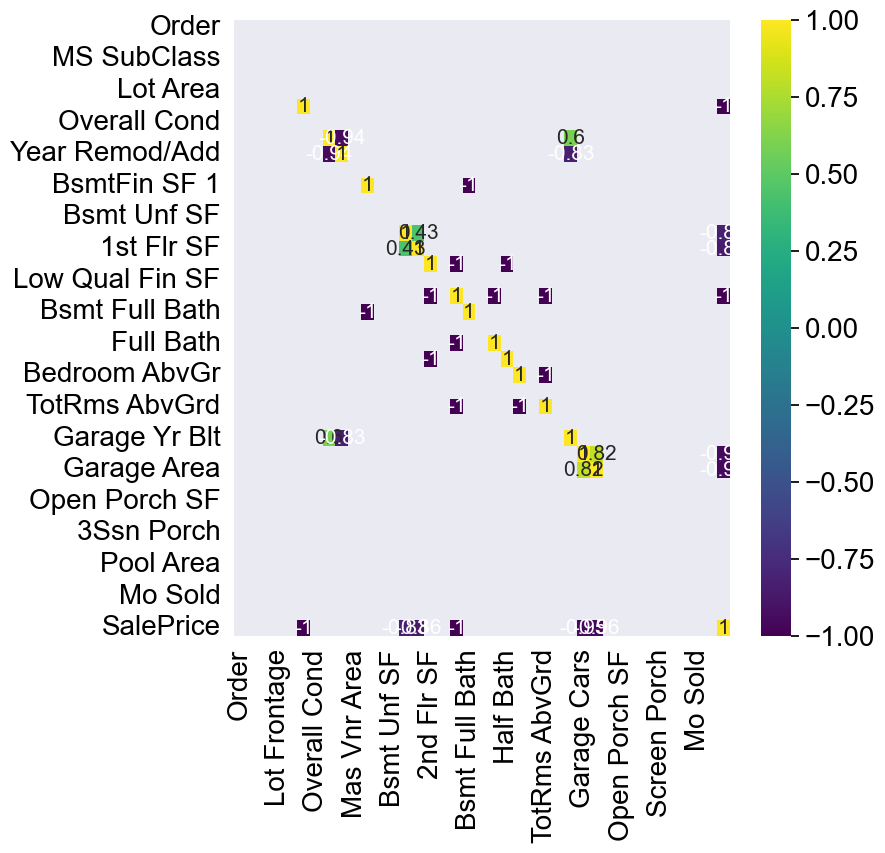

In [8]:
# Importamos las librerías necesarias para realizar el gráfico y Graficamos correlación mayor al 60 %:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

corr = high_correlation.corr()
    
sns.set(rc={"font.style":"normal",
            "axes.titlesize":30,
           "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(8.0, 8.0),
            'xtick.labelsize':20,
            'ytick.labelsize':20})
sns.heatmap(corr,annot = True, annot_kws={"size": 15},cmap="viridis")

plt.show()